# SpringfieldVision: Machine and Deep Learning for Simpsons Character Classification

In [2]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
John Callahan


**Course:** CISB 60 – ML and DL (Fall, 2024)

### Problem Statement
* The goal of this project is to develop a machine learning and deep learning pipeline to classify images of characters from The Simpsons TV show. Using a dataset of labeled images featuring five characters—Abraham Grampa Simpson, Bart Simpson, Homer Simpson, Lisa Simpson, and Marge Simpson—this project aims to create accurate models that can distinguish between these characters.

* The models will leverage Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) for image classification. The performance will be evaluated based on accuracy, loss, and class-specific metrics, with additional analysis through confusion matrices and other evaluation techniques.
    
    
    
* **Keywords:*
Simpsons image classification, Simpson character images, Simpsons character annotations, Simpson image labels, Simpson face detection, Homer Simpson, Marge Simpson, Bart Simpson, Lisa Simpson, Grampa Abraham Simpson, Simpsons character classification, Image classification with CNNs, Deep learning for image recognition ,Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN)

### Required packages

* Add instructions to install the required packages


In [101]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

%matplotlib inline

#import warnings and ignore them
import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras import backend as K  
from keras import datasets, layers, models
from tensorflow.keras import regularizers

from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

from keras.layers import Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam

#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import datetime

### Methodology

1. Explain your ML and DL methodology

Data Preparation:

The dataset contains 7,156 labeled images of five characters: Abraham Grampa Simpson, Bart Simpson, Homer Simpson, Lisa Simpson, and Marge Simpson.
Images were resized to 128x128x3 dimensions and normalized to values between 0 and 1 for consistent training and improved model performance.
The dataset was split into training (80%) and testing (20%) subsets using train_test_split, resulting in:
Training set: 5,724 images
Testing set: 1,432 images.
Model Selection:

Two types of models were implemented:
Artificial Neural Network (ANN):
The ANN consisted of fully connected layers with dropout for regularization and a softmax activation function for classification.
Designed to serve as a baseline model for comparison with more complex architectures.
Convolutional Neural Network (CNN):
The CNN architecture used convolutional layers, max pooling, batch normalization, and dropout layers to capture spatial patterns in the images.
The CNN was chosen for its superior ability to handle image data and achieve higher accuracy.
Model Training:

Both models were trained using:
Adam optimizer for efficient gradient updates.
Loss functions:
Categorical Crossentropy for one-hot encoded labels.
Sparse Categorical Crossentropy for integer labels in some experiments.
Accuracy was used as the primary evaluation metric during training and validation.
Evaluation Metrics:

Loss and Accuracy Graphs: Monitored training and validation performance over epochs to detect overfitting or underfitting.
Confusion Matrix: Provided insights into class-specific performance, highlighting misclassifications and model bias toward specific classes (e.g., Homer Simpson).
Mean Absolute Error (MAE): Used for additional evaluation of prediction precision.

2. Introduce the topics you used in your project
 * Model 1
    * ANN Model with SGD Optimization
 
 * Model 2
    * CNN with Adam Optimizer
 

### Your code starts here

### Load the dataset

In [27]:
#Create load_image_dataset function that reads all images and loads them
def load_image_dataset(directory_path, target_size=(128, 128)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory_path))  # Subdirectories are class labels

    for class_name in class_names:
        class_path = os.path.join(directory_path, class_name)
        if os.path.isdir(class_path):
            print(f"Processing class: {class_name}")
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Load and resize image
                    img = Image.open(img_path).convert('RGB')  # Convert to RGB
                    img = img.resize(target_size)
                    images.append(np.array(img))  # Convert image to numpy array
                    labels.append(class_name)  # Use the directory name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    
    print(f"Loaded {len(images)} images and {len(labels)} labels.")
    return np.array(images), labels

# Reload the dataset
X, y = load_image_dataset(dataset_path, target_size=(128, 128))

Processing class: abraham_grampa_simpson
Processing class: bart_simpson
Processing class: homer_simpson
Processing class: lisa_simpson
Processing class: marge_simpson
Loaded 7156 images and 7156 labels.


In [28]:
#Convert images and label to a NumPy array

img_size = (128, 128)

# X and y already contain data from the `load_image_dataset` function
print(f"Initial data: {len(X)} images, {len(y)} labels.")

# Normalize image data to [0, 1]
X = np.array(X).astype('float32') / 255.0

# Convert labels to a NumPy array
y = np.array(y)

# Verify the shapes
print(f"X shape: {X.shape}")  # Should be (7156, 128, 128, 3)
print(f"y shape: {y.shape}")  # Should be (7156,)


Initial data: 7156 images, 7156 labels.
X shape: (7156, 128, 128, 3)
y shape: (7156,)


In [32]:
#Split train and test 80-20 and print the shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2)

print(f"X_train shape: ", X_train.shape)
print(f"y_train shape: ", y_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_test shape: ", y_test.shape)

X_train shape:  (5724, 128, 128, 3)
y_train shape:  (5724,)
X_test shape:  (1432, 128, 128, 3)
y_test shape:  (1432,)


### Visualize Dataset

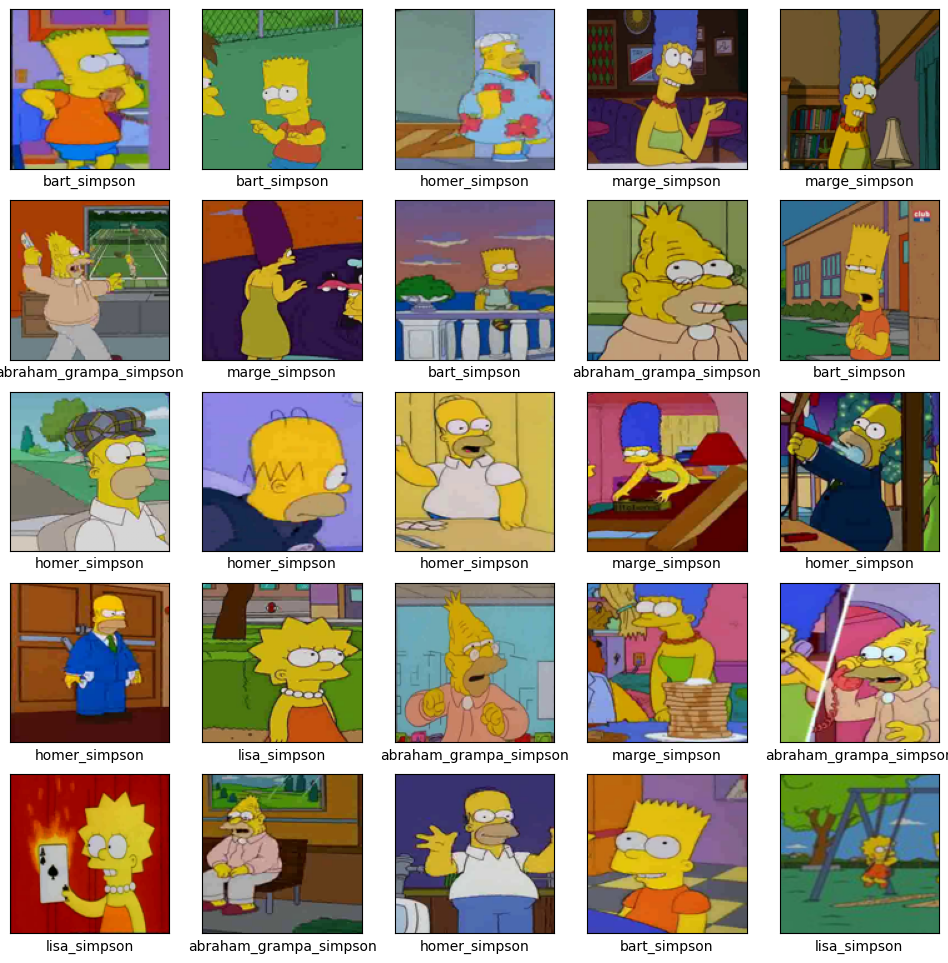

In [38]:
#Visualize Images
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


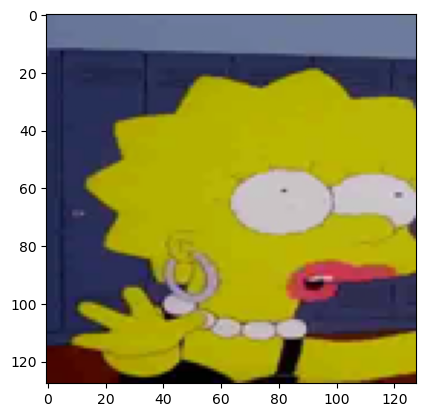

In [41]:
#Select sample image
sample = plt.imshow(X_test[100])

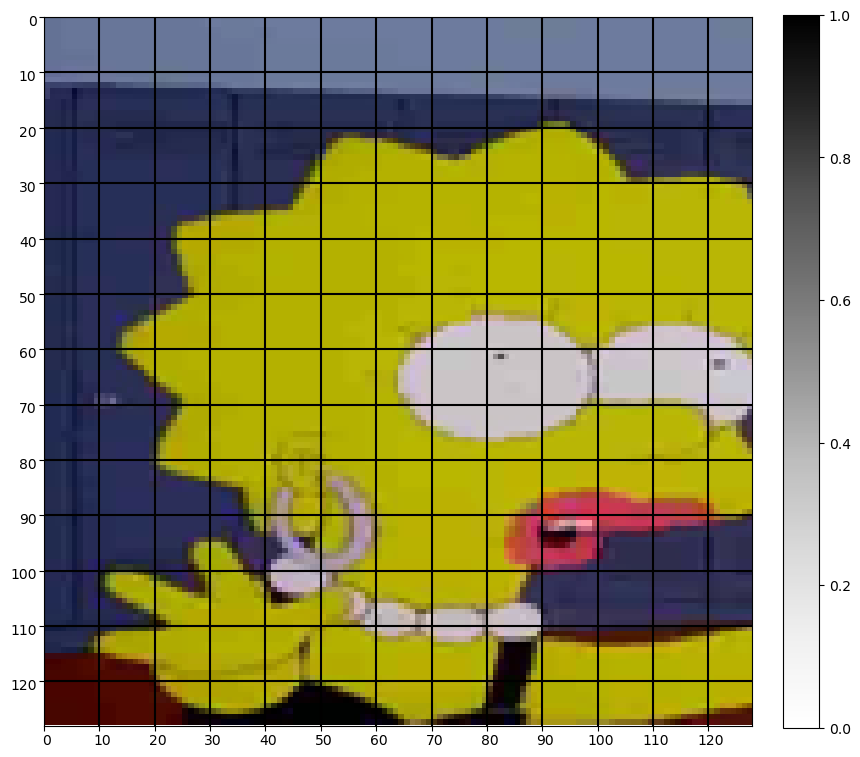

In [50]:
# Plot the sample image
plt.figure(figsize=(10, 10))
img = X_test[100]
img_array = np.array(img)
plt.imshow(img_array, cmap="Greys")  # Plot the image (remove cmap if not grayscale)
ax = plt.gca()

# Turn off the major labels but keep the major ticks
plt.tick_params(
    axis='both',        # Apply changes to both x and y axes
    which='major',      # Affect the major ticks
    bottom=True,        # Keep the bottom ticks
    left=True,          # Keep the left ticks
    labelbottom=False,  # Remove bottom tick labels
    labelleft=False     # Remove left tick labels
)

# Turn off the minor ticks but keep the minor labels
plt.tick_params(
    axis='both',        # Apply changes to both x and y axes
    which='minor',      # Affect the minor ticks
    bottom=False,       # Remove bottom minor ticks
    left=False,         # Remove left minor ticks
    labelbottom=True,   # Keep bottom minor tick labels
    labelleft=True      # Keep left minor tick labels
)

# Set major ticks (adjust based on your image dimensions)
image_shape = img_array.shape[0]  # Assume square or rectangular shape
ax.set_xticks(np.arange(-.5, image_shape, 10))  # Major ticks every 10 pixels
ax.set_yticks(np.arange(-.5, image_shape, 10))  # Major ticks every 10 pixels

# Set minor ticks and labels
ax.set_xticks(np.arange(0, image_shape, 10), minor=True)  # Minor ticks every 10 pixels
ax.set_xticklabels([str(i) for i in np.arange(0, image_shape, 10)], minor=True)  # Minor tick labels
ax.set_yticks(np.arange(0, image_shape, 10), minor=True)
ax.set_yticklabels([str(i) for i in np.arange(0, image_shape, 10)], minor=True)

# Add a grid
ax.grid(color='black', linestyle='-', linewidth=1.5)

# Add a colorbar
plt.colorbar(fraction=0.046, pad=0.04)

# Display the plot
plt.show()

### Data Preprocessing

In [86]:
# Encode string labels into integers
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)  # Convert string labels to integers
y_test_int = label_encoder.transform(y_test)  # Use the same mapping for test labels

# One-hot encode the integer labels
num_classes = len(label_encoder.classes_)  # Dynamically calculate the number of classes
y_train_onehot = to_categorical(y_train_int, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_int, num_classes=num_classes)

# Create a mapping between original labels and their integer representation
class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

# Add mapping for original classes and one-hot encodings
original_and_onehot = {
    "Original Label": [class_mapping[i] for i in range(num_classes)],
    "One-Hot Encoding": [to_categorical([i], num_classes=num_classes).flatten().tolist() for i in range(num_classes)]
}

# Verify the output shapes
print(f"y_train shape: {y_train_onehot.shape}")  # Should be (5724, num_classes)
print(f"y_test shape: {y_test_onehot.shape}")    # Should be (1432, num_classes)

# Display the mapping of original classes and one-hot encodings
original_and_onehot_df = pd.DataFrame(original_and_onehot)
print(original_and_onehot_df)

y_train shape: (5724, 5)
y_test shape: (1432, 5)
           Original Label           One-Hot Encoding
0  abraham_grampa_simpson  [1.0, 0.0, 0.0, 0.0, 0.0]
1            bart_simpson  [0.0, 1.0, 0.0, 0.0, 0.0]
2           homer_simpson  [0.0, 0.0, 1.0, 0.0, 0.0]
3            lisa_simpson  [0.0, 0.0, 0.0, 1.0, 0.0]
4           marge_simpson  [0.0, 0.0, 0.0, 0.0, 1.0]


### Build an Artificial Neural Network

In [71]:
# instantiate the model
model = Sequential()

# Input layer
# input shape is the size of the picture
model.add(Dense(32, activation='relu',input_shape=(128,128,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [72]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128, 128, 32)      128       
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 flatten_2 (Flatten)         (None, 524288)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               67108992  
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 67,109,765
Trainable params: 67,109,765


In [73]:
# Compile Model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
# Train the Model
model.fit(X_train, y_train_onehot, epochs=15, batch_size=128, verbose=1, validation_data=(X_test, y_test_onehot))

Epoch 1/15
45/45 [==============================] - 82s 2s/step - loss: 1.4879 - accuracy: 0.3793 - val_loss: 1.2645 - val_accuracy: 0.5161
Epoch 2/15
45/45 [==============================] - 81s 2s/step - loss: 1.2804 - accuracy: 0.4958 - val_loss: 1.1847 - val_accuracy: 0.5244
Epoch 3/15
45/45 [==============================] - 81s 2s/step - loss: 1.1790 - accuracy: 0.5297 - val_loss: 1.0950 - val_accuracy: 0.5517
Epoch 4/15
45/45 [==============================] - 82s 2s/step - loss: 1.1246 - accuracy: 0.5452 - val_loss: 1.0429 - val_accuracy: 0.5852
Epoch 5/15
45/45 [==============================] - 84s 2s/step - loss: 1.0766 - accuracy: 0.5632 - val_loss: 1.0212 - val_accuracy: 0.5971
Epoch 6/15
45/45 [==============================] - 81s 2s/step - loss: 1.0390 - accuracy: 0.5881 - val_loss: 0.9892 - val_accuracy: 0.6034
Epoch 7/15
45/45 [==============================] - 80s 2s/step - loss: 1.0016 - accuracy: 0.6055 - val_loss: 0.9617 - val_accuracy: 0.6369
Epoch 8/15
45/45 [==

### Visualizing the Evaluation

Text(0.5, 1.0, 'Model Loss')

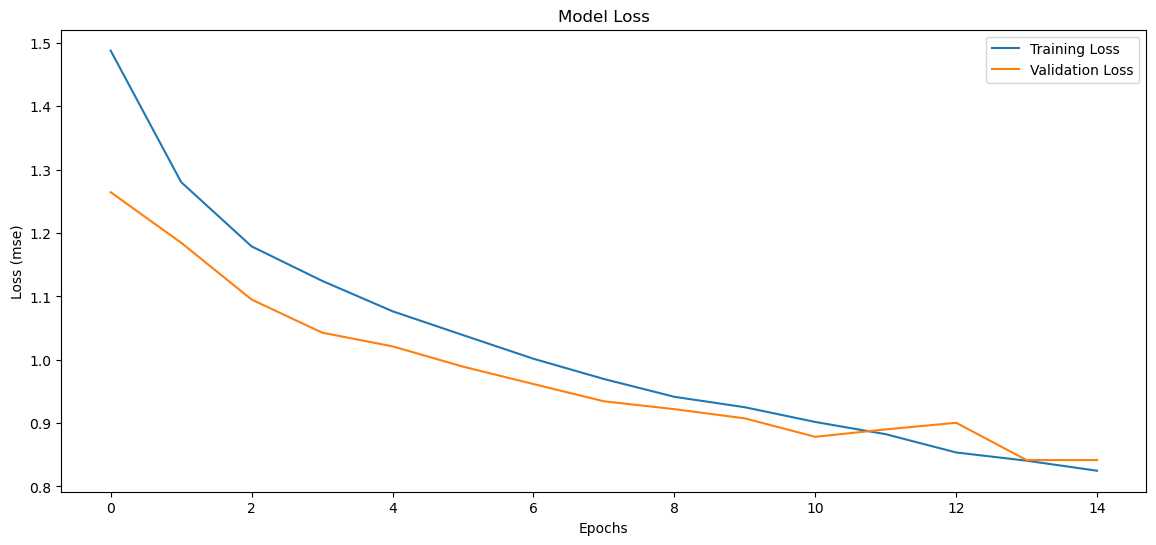

In [75]:
# Loss curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss (mse)', fontsize=10)
plt.title('Model Loss', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

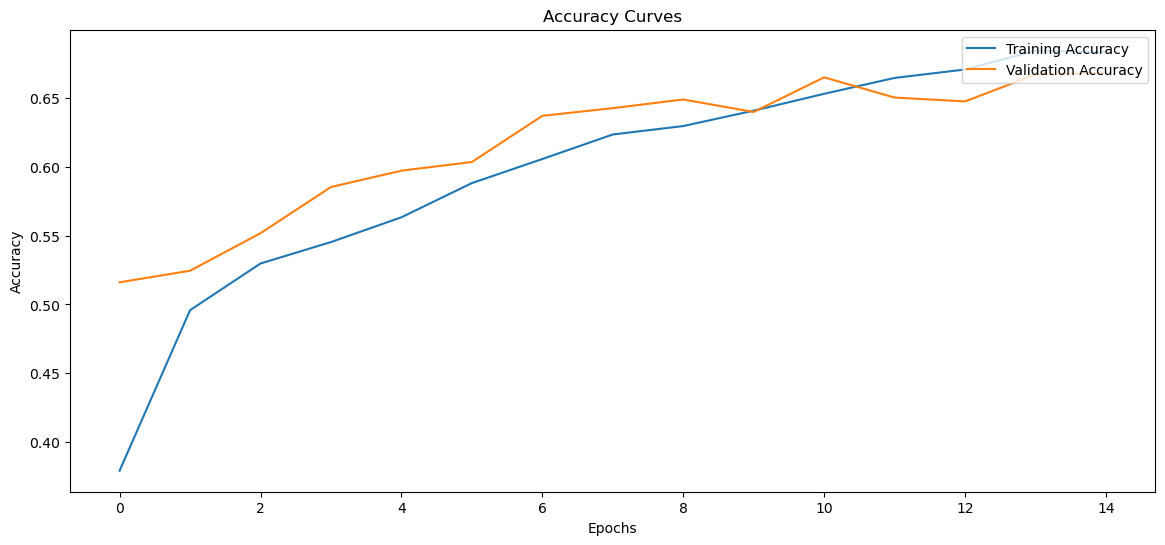

In [76]:
# Accuracy curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [79]:
# Evaluate model(loss and accuracy)
loss, accuracy = model.evaluate(X_test, y_test_onehot)

45/45 [==============================] - 4s 87ms/step - loss: 0.8417 - accuracy: 0.6683


In [82]:
# Predict the result
ann_pred = model.predict(X_test)

for i in range (0,4):
    print('Prediction: ', ann_pred[i], ', True Value: ', y_test_onehot[i],'\n')

45/45 [==============================] - 4s 86ms/step
Prediction:  [0.8812064  0.02164121 0.0640769  0.02737005 0.0057055 ] , True Value:  [1. 0. 0. 0. 0.] 

Prediction:  [0.01189398 0.49819422 0.12787643 0.35465395 0.00738149] , True Value:  [0. 1. 0. 0. 0.] 

Prediction:  [0.12490243 0.12036011 0.53886366 0.09898999 0.11688384] , True Value:  [1. 0. 0. 0. 0.] 

Prediction:  [0.04863457 0.11780313 0.6969879  0.11691163 0.0196627 ] , True Value:  [0. 0. 1. 0. 0.] 



In [83]:
# Confusion Matrix Function
# Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observation')
    plt.xlabel('Prediction')

45/45 [==============================] - 4s 86ms/step


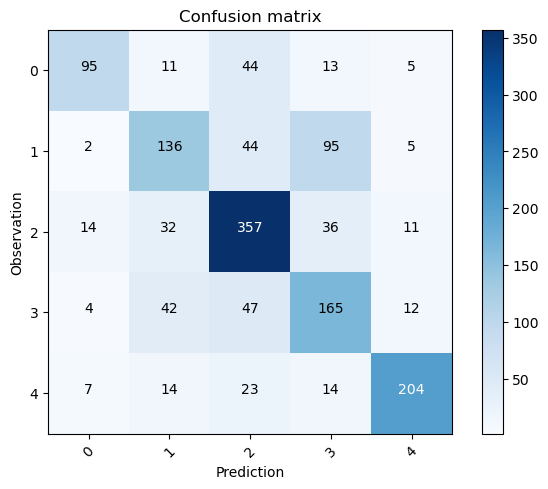

In [85]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_onehot, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5))

### ANN Summary

Loss Graph:
-  Training Loss: The loss steadily decreases across epochs, starting above 1.5 and approaching 0.85 by the final epoch. This indicates that the model is learning effectively from the training data.
-  Validation Loss: The validation loss decreases consistently, starting at around 1.2 and reaching close to 0.85. It closely follows the training loss, suggesting that the model generalizes well to unseen data without overfitting.<br>

Accuracy Graph:
-  Training Accuracy: The accuracy increases steadily over epochs, starting at approximately 40% and reaching nearly 67% by the end. This shows a clear improvement in the model's performance on the training set.
-  Validation Accuracy: Validation accuracy also improves significantly, starting at around 55% and aligning closely with the training accuracy toward the final epochs. The close tracking of training and validation accuracy indicates that the model is not overfitting.

The model achieved a training accuracy of 66.83% with a loss of 0.8417, indicating moderate performance and potential room for improvement.  The model is most accurate for class 2 (homer_simpson) with 357 correct predictions and least accurate for classes 0 and 1 (abraham_grampa_simpson and bart_simpson) with notable misclassifications across other categories.  The model confidently predicted class 0 with 88.12% probability, matching the true value. Class 2 appears to dominate predictions, which may suggest imbalance or overfitting to this class.

### Building a Convolutional Neural Network (CNN)

In [87]:
# Creating a sequential model and adding layers to it

model = Sequential()

# first Convolutional layer
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(layers.BatchNormalization())

# second layer
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

# third layer
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# fourth
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

# fifth
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

# sixth
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

# Adding a dense layer (fully connected)
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 5

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [88]:
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                      

In [89]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [91]:
# Train the model
model.fit(X_train, y_train_onehot, batch_size=64, epochs=15, validation_data=(X_test, y_test_onehot), callbacks=[tensorboard_callback])

Epoch 1/15
90/90 [==============================] - 1091s 12s/step - loss: 1.1914 - accuracy: 0.5898 - val_loss: 3.5984 - val_accuracy: 0.2207
Epoch 2/15
90/90 [==============================] - 3207s 36s/step - loss: 0.8945 - accuracy: 0.6836 - val_loss: 2.5341 - val_accuracy: 0.3142
Epoch 3/15
90/90 [==============================] - 1120s 12s/step - loss: 0.7027 - accuracy: 0.7463 - val_loss: 3.0275 - val_accuracy: 0.3115
Epoch 4/15
90/90 [==============================] - 1095s 12s/step - loss: 0.5616 - accuracy: 0.7923 - val_loss: 2.6493 - val_accuracy: 0.3527
Epoch 5/15
90/90 [==============================] - 1091s 12s/step - loss: 0.4613 - accuracy: 0.8314 - val_loss: 0.9694 - val_accuracy: 0.6187
Epoch 6/15
90/90 [==============================] - 1093s 12s/step - loss: 0.3668 - accuracy: 0.8667 - val_loss: 1.1525 - val_accuracy: 0.6173
Epoch 7/15
90/90 [==============================] - 1097s 12s/step - loss: 0.3064 - accuracy: 0.8905 - val_loss: 0.4129 - val_accuracy: 0.8631

### Visualizing the Evaluation

Text(0.5, 1.0, 'Model Loss')

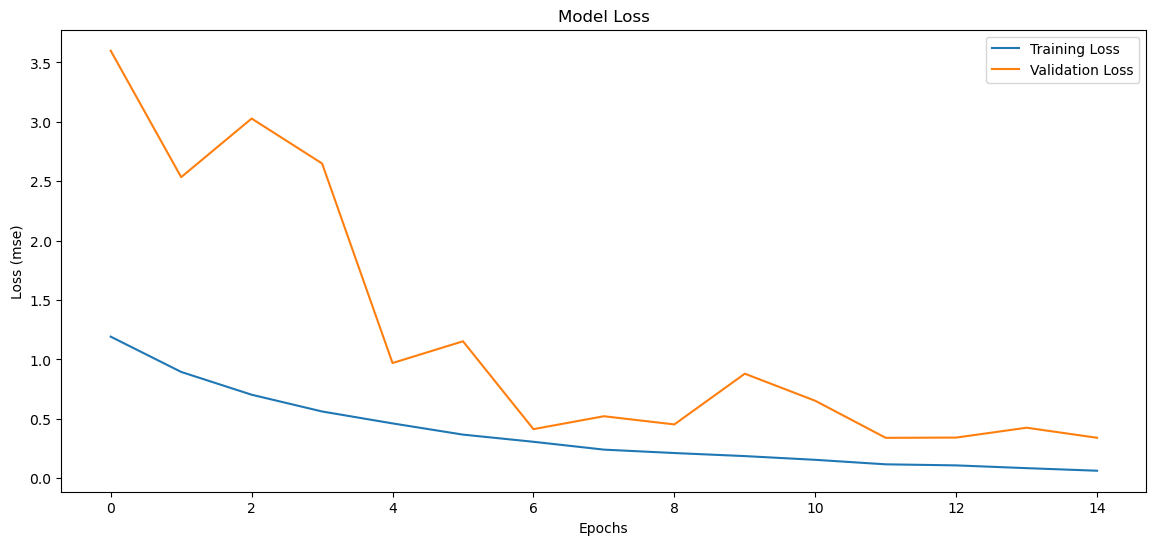

In [92]:
# Loss curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss (mse)', fontsize=10)
plt.title('Model Loss', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

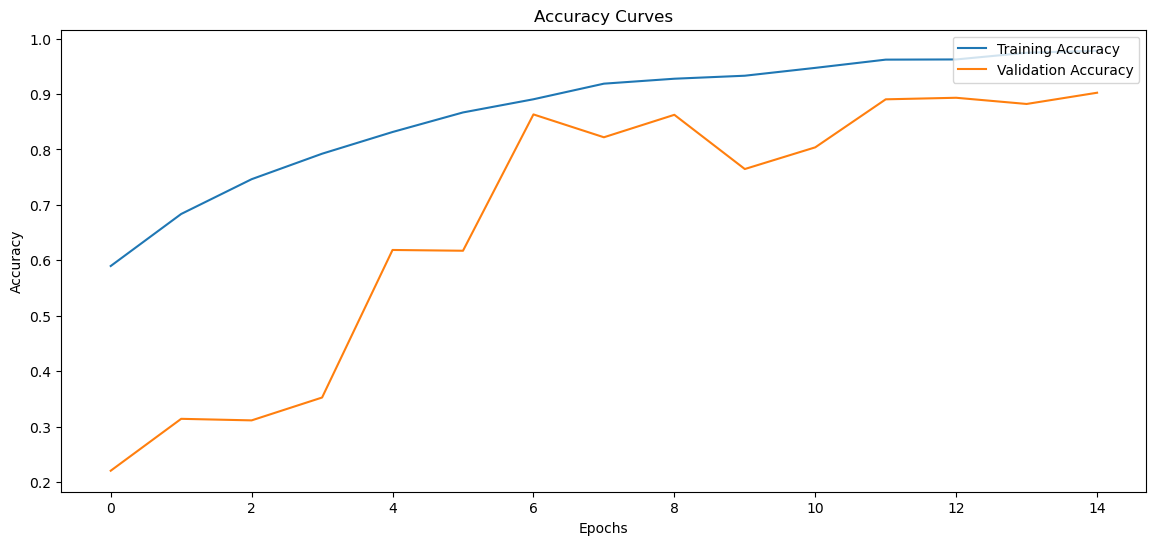

In [93]:

# Accuracy curve
plt.figure(figsize=[14,6])
plt.plot(model.history.history['accuracy'][:])
plt.plot(model.history.history['val_accuracy'][:])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [96]:
# Evaluate model(loss and accuracy)
loss, accuracy = model.evaluate(X_test, y_test_onehot)

45/45 [==============================] - 62s 1s/step - loss: 0.3402 - accuracy: 0.9022


In [99]:
# Predict the result
ann_pred = model.predict(X_test)

for i in range (0,4):
    print('Prediction: ', ann_pred[i], ', True Value: ', y_test_onehot[i],'\n')

45/45 [==============================] - 61s 1s/step
Prediction:  [9.9998724e-01 5.6691744e-07 2.6123590e-07 1.1661575e-05 1.9797392e-07] , True Value:  [1. 0. 0. 0. 0.] 

Prediction:  [2.9220695e-05 9.9971241e-01 3.9968265e-05 2.1082364e-04 7.4852960e-06] , True Value:  [0. 1. 0. 0. 0.] 

Prediction:  [3.4068383e-03 6.2168785e-04 9.9594128e-01 9.6350805e-06 2.0581436e-05] , True Value:  [1. 0. 0. 0. 0.] 

Prediction:  [5.3868775e-05 7.5125652e-05 9.9982822e-01 2.8339053e-05 1.4449815e-05] , True Value:  [0. 0. 1. 0. 0.] 



45/45 [==============================] - 64s 1s/step


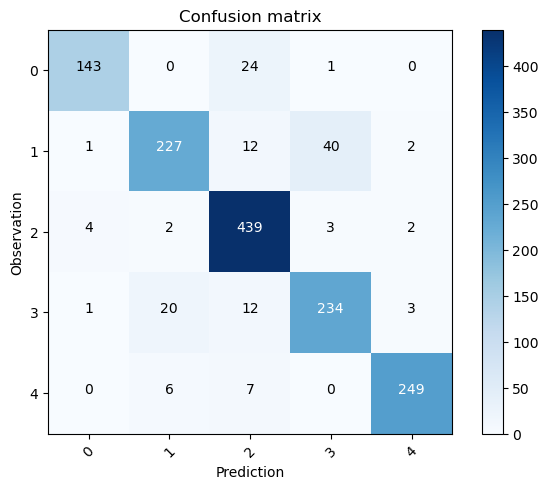

In [95]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_onehot, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(5))

In [102]:
# Display the prediction of first 5 values, then calculate mae, lastly print first 5 predictions
# Let's check how much we are off on average 
# Enter three lines of code here:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test_onehot, y_pred)
y_pred[0:5]                                                                  

45/45 [==============================] - 64s 1s/step


array([[9.9998724e-01, 5.6691744e-07, 2.6123590e-07, 1.1661575e-05,
        1.9797392e-07],
       [2.9220695e-05, 9.9971241e-01, 3.9968265e-05, 2.1082364e-04,
        7.4852960e-06],
       [3.4068383e-03, 6.2168785e-04, 9.9594128e-01, 9.6350805e-06,
        2.0581436e-05],
       [5.3868775e-05, 7.5125652e-05, 9.9982822e-01, 2.8339053e-05,
        1.4449815e-05],
       [1.3232843e-02, 5.5358345e-03, 9.7002316e-01, 1.0748103e-02,
        4.6004215e-04]], dtype=float32)

In [103]:
# Print mae value
mae

0.04716582

Loss Graph:
-  Training Loss: The training loss decreases steadily over the epochs, starting at a higher value and approaching near 0.0 toward the final epochs. This indicates that the model is learning effectively and minimizing error on the training dataset.
-  Validation Loss: The validation loss starts much higher than the training loss (above 3.5) but drops significantly within the first few epochs, aligning closer to the training loss by the end. There are slight fluctuations in validation loss after epoch 6, which could indicate minor overfitting or variability in the validation set.<br>

Accuracy Graph:
-  Training Accuracy: Training accuracy steadily increases over the epochs, starting at around 60% and approaching near 100% by the final epoch. This consistent improvement indicates that the model is effectively learning from the training data.
-  Validation Accuracy: Validation accuracy starts much lower, around 20%, but improves significantly over the first few epochs. By the end of training, validation accuracy stabilizes near 90%, closely aligning with the training accuracy, which is a strong sign of good generalization.

The model achieved a training accuracy of 90.22% with a loss of 0.3402, demonstrating strong performance and effective learning. The model is most accurate for class 2 (homer_simpson)  with 439 correct predictions, while class 1 (bart_simpson) shows more notable misclassifications, especially with confusion between classes 1 (bart_simpson) and 3 (lisa_simpson).

Class 2 (homer_simpson) dominates predictions with high accuracy, which could suggest a potential class imbalance or the model being better tuned to this class. With a mean absolute error (MAE) of 0.0472, the model shows high precision and well-calibrated predictions overall. Further refinement could focus on improving class differentiation, particularly for classes with higher misclassification rates.

### Plotting Actual vs Predicted Results

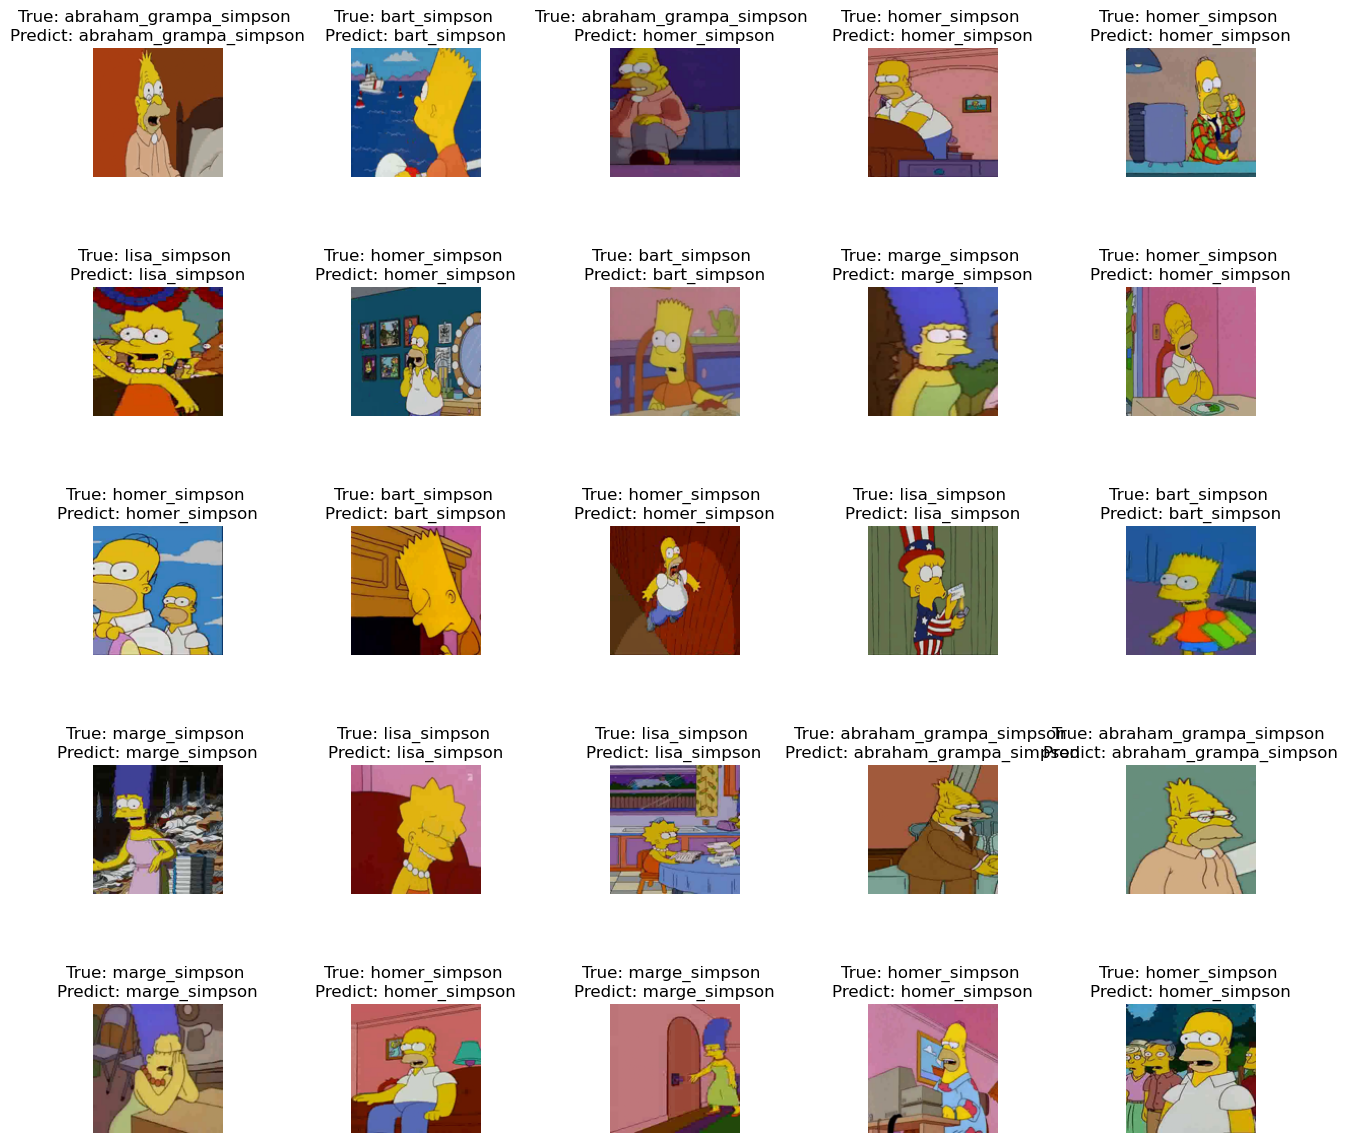

In [106]:
# Plot 25 images from testing data to see how many were predicted correctly
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test_onehot[i])], class_names[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

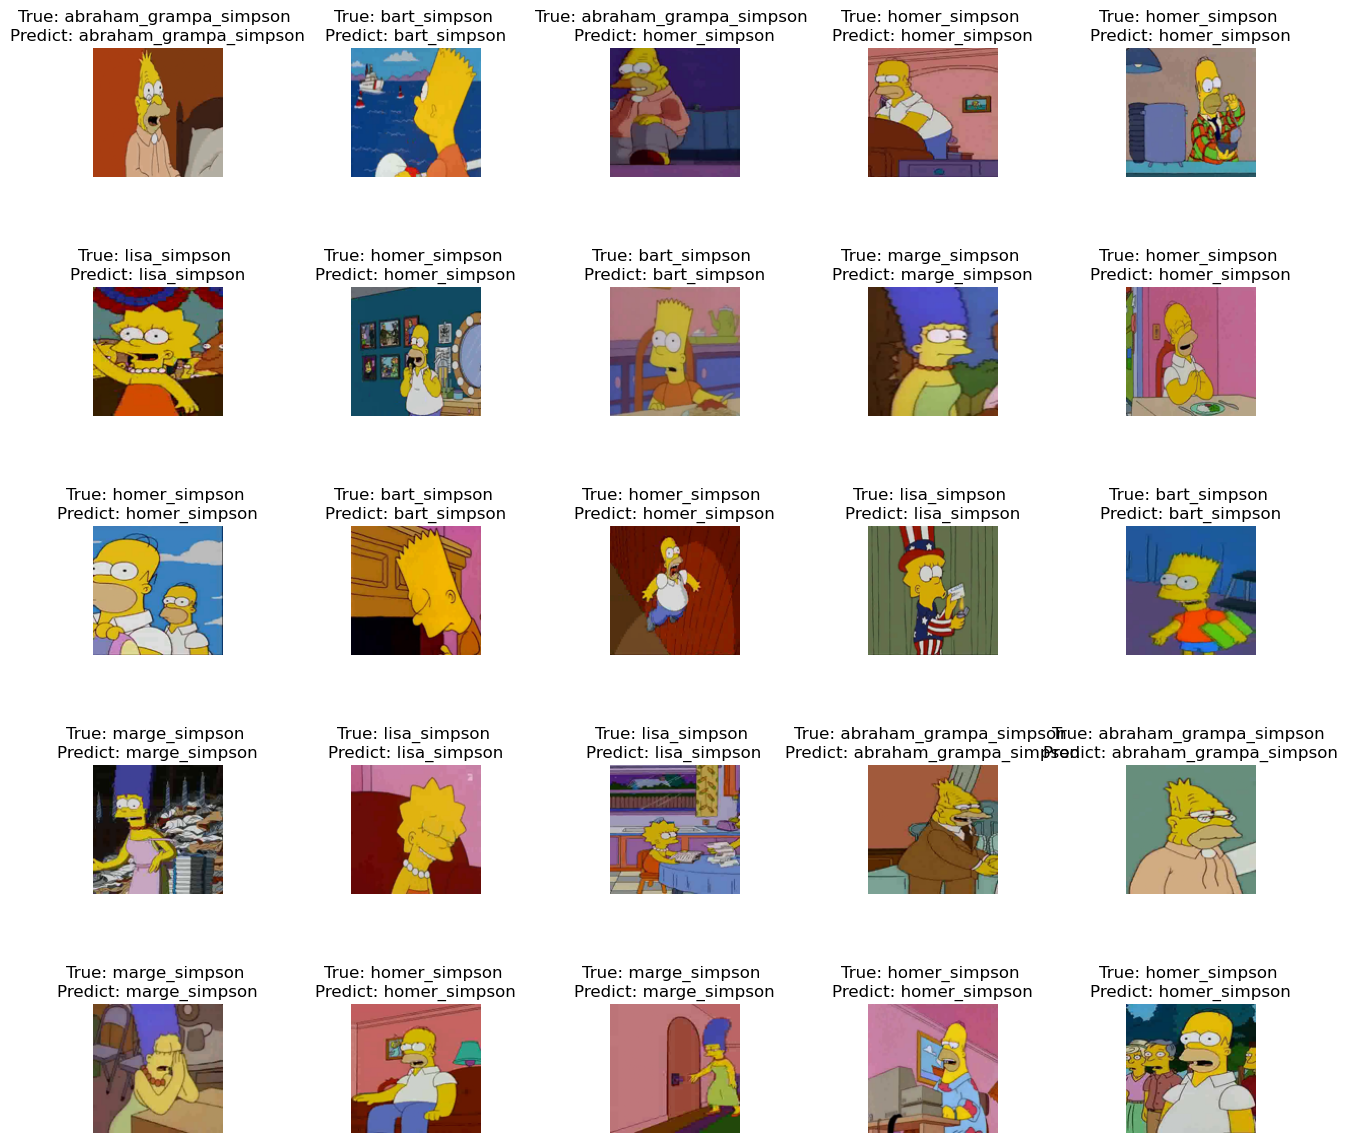

In [108]:
# Predicting 25 more examples
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test_onehot[i])], class_names[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Model Behavior: The model demonstrates strong performance in predicting characters, with many correct classifications.
Correct Predictions: Most predictions align well with the true labels, particularly for Homer Simpson, who appears frequently in the examples.
Misclassifications:  A few examples highlight misclassifications, such as Abraham Grampa Simpson being misclassified as Homer Simpson.
Visual Trends:  The model seems to perform best with characters having distinct features (e.g., Lisa Simpson with spiked hair or Homer Simpson with his unique build).  Misclassifications often involve subtler differences in features, lighting, or background.
Possible Improvement: Focus on improving predictions for less distinct characters like Abraham Grampa Simpson by introducing additional examples or targeted augmentation.  Evaluate feature overlap between misclassified characters to identify areas for model refinement.

### TensorBoard

#### Executed in 2nd Notebook named TensorBoard
#### Load the TensorBoard notebook extension
%load_ext tensorboard

%tensorboard --logdir logs/fit

In [111]:
# import datetime
import datetime

In [121]:
# Define create_model function
def create_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
  ])

In [124]:
# Call create_model function:
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Generate the logs for Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# fit the model 
history = model.fit(x=X_train, y=y_train_onehot, epochs=10, validation_data=(X_test, y_test_onehot), callbacks=[tensorboard_callback])

Epoch 1/10
179/179 [==============================] - 12s 62ms/step - loss: 2.6213 - accuracy: 0.2954 - val_loss: 1.5936 - val_accuracy: 0.3142
Epoch 2/10
179/179 [==============================] - 11s 61ms/step - loss: 1.5871 - accuracy: 0.3138 - val_loss: 1.5789 - val_accuracy: 0.3142
Epoch 3/10
179/179 [==============================] - 9s 50ms/step - loss: 1.5768 - accuracy: 0.3138 - val_loss: 1.5706 - val_accuracy: 0.3142
Epoch 4/10
179/179 [==============================] - 9s 47ms/step - loss: 1.5712 - accuracy: 0.3138 - val_loss: 1.5661 - val_accuracy: 0.3142
Epoch 5/10
179/179 [==============================] - 9s 48ms/step - loss: 1.5685 - accuracy: 0.3138 - val_loss: 1.5640 - val_accuracy: 0.3142
Epoch 6/10
179/179 [==============================] - 8s 47ms/step - loss: 1.5673 - accuracy: 0.3138 - val_loss: 1.5630 - val_accuracy: 0.3142
Epoch 7/10
179/179 [==============================] - 8s 47ms/step - loss: 1.5667 - accuracy: 0.3138 - val_loss: 1.5624 - val_accuracy: 0.31

### Conclusions


Objective Achievement:

    -The project successfully tackled the problem of classifying Simpsons characters using machine learning and deep learning techniques. The dataset provided a robust base for training models to identify five distinct characters: Abraham Grampa Simpson, Bart Simpson, Homer Simpson, Lisa Simpson, and Marge Simpson.

Data Preparation:

    -The dataset of 7,156 images was effectively preprocessed through resizing to 128x128x3, normalization, and splitting into training and testing sets (80-20). This ensured that the data was ready for model training while maintaining a balanced evaluation pipeline.
    
Model Design and Methodology:

    -Used both  Artificial Neural Network (ANN) and Convolutional Neural Network (CNN) for image classification tasks. The combination of SGD and Adam optimizers allowed for experimentation with different optimization techniques to improve accuracy and generalization.
    
Summary of Findings:
Artificial Neural Network (ANN)
Performance:

Training Accuracy: 66.83%
Training Loss: 0.8417
Validation Accuracy: Closely aligns with training accuracy, reaching ~67%, indicating good generalization without overfitting.
Loss and Accuracy Trends:

Training and validation losses steadily decreased across epochs, ending at 0.85, showing effective learning.
Training accuracy improved from 40% to nearly 67%, while validation accuracy increased from 55%, tracking closely to the training performance.
Class-Specific Observations:

The model performed best for class 2 (Homer Simpson) with 357 correct predictions.
Misclassifications were most notable for class 0 (Abraham Grampa Simpson) and class 1 (Bart Simpson).
Class 2 dominated predictions, which may indicate an imbalance or overfitting toward this class.
Conclusion:

The ANN demonstrated moderate performance, but improvements are needed to reduce misclassifications and balance predictions across all classes.

Convolutional Neural Network (CNN)
Performance:

Training Accuracy: 90.22%
Training Loss: 0.3402
Validation Accuracy: Reached ~90%, aligning closely with training accuracy, which reflects strong generalization.
Loss and Accuracy Trends:

Training loss decreased steadily toward 0.0, while validation loss started high (3.5) and aligned with training loss by the final epochs.
Training accuracy improved from 60% to near 100%, with validation accuracy increasing from 20% to ~90%, showing effective learning.
Class-Specific Observations:

The model performed best for class 2 (Homer Simpson) with 439 correct predictions.
Misclassifications were most frequent for class 1 (Bart Simpson), particularly with confusion between Bart and Lisa Simpson (class 3).
Class 2 continued to dominate predictions, suggesting a potential class imbalance or model bias toward this class.
Conclusion:

The CNN demonstrated superior performance compared to the ANN, with significantly higher accuracy and better generalization.
Refinements are still needed to improve differentiation for classes with higher misclassification rates and address potential biases toward class 2.

Overall Observations:
The CNN significantly outperformed the ANN in terms of accuracy and loss, making it the preferred model for this task.
Both models exhibited strong performance for Homer Simpson (class 2) but struggled with distinguishing Bart Simpson and Lisa Simpson, highlighting the need for further tuning.
Addressing class imbalance and improving feature differentiation through techniques like data augmentation, weighted loss functions, or advanced architectures (e.g., transfer learning) could further enhance performance.

###  References
   - Academic (if any)
   - Online (if any)
	

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

Aron Joo, https://github.com/Aedufare/CISB62_Final/blob/main/CISB62_Final_AronJoo.ipynb

In [ ]:
# End of Project